In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Number of sequences in the R2C2_clean.fasta

In [4]:
!wc -l R2C2_clean.fasta 
print(str(49748/2) + " pieces of data")

   49748 R2C2_clean.fasta
24874.0 pieces of data


Read and Analyze R2C2_clean.fasta

In [9]:
bb = pd.read_csv('R2C2_clean.fasta', header=None)

In [10]:
bb = pd.DataFrame(list(zip(bb.iloc[::2].values.reshape(-1), bb.iloc[1::2].values.reshape(-1))), 
               columns =['Name', 'Sequence']) #24874
bb['Name'] = bb['Name'].str[1:]

In [11]:
print(bb.shape)
bb.head()

(24874, 2)


,Name,Sequence
0,db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328...,GCTCTTCCGATCTGACGCAGGGCAAAAGACCCAGCATTTTCCTGTC...
1,03cf611-28ca-4bbd-93a4-3095e832cce0_14.93_1894...,ATGCTCTTCCGATCTGACGCAGGGCAAAGACCAGCATTTTCCTGTC...
2,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,ATGCTCTTCCGATCTGACGCAGGGCAAAGACCAGCCTGACCAACAT...
3,b0f9dc4-aaf3-4cc7-a3cf-e15b794ba0bf_15.72_1394...,TGCTTCTTCCGATCTGACACAGGGCAAAGACCAGCATTTTCCTGTC...
4,dfff674-befc-49ef-9f81-9063984c1571_14.23_1740...,ATGCTCTTCCGATCTGACACAGGGCAAAGACCCCAATGCCCAAAGA...


In [23]:
bb['name'], bb['score'],bb['oriLen'], bb['repeats'], bb['subLen'], bb['consLen'] = bb['Name'].str.split('_', 5).str

In [24]:
bb = bb.drop(columns=['Name'])
bb[['oriLen', 'repeats', 'subLen', 'consLen']] = bb[['oriLen', 'repeats', 'subLen', 'consLen']].astype(int)
bb[['score']] = bb[['score']].astype(float)

In [25]:
bb.head()

,Sequence,score,oriLen,repeats,subLen,consLen,name
0,GCTCTTCCGATCTGACGCAGGGCAAAAGACCCAGCATTTTCCTGTC...,15.91,1328,1,662,284,db68828-7ad5-47c2-b2de-edfee3141c16
1,ATGCTCTTCCGATCTGACGCAGGGCAAAGACCAGCATTTTCCTGTC...,14.93,1894,1,733,337,03cf611-28ca-4bbd-93a4-3095e832cce0
2,ATGCTCTTCCGATCTGACGCAGGGCAAAGACCAGCCTGACCAACAT...,13.24,1954,1,624,230,954efb3-70f9-46ba-88fb-e58b75b21cf0
3,TGCTTCTTCCGATCTGACACAGGGCAAAGACCAGCATTTTCCTGTC...,15.72,1394,1,734,343,b0f9dc4-aaf3-4cc7-a3cf-e15b794ba0bf
4,ATGCTCTTCCGATCTGACACAGGGCAAAGACCCCAATGCCCAAAGA...,14.23,1740,1,662,281,dfff674-befc-49ef-9f81-9063984c1571


Plotting the distributions...
oriLen: the origional length of the sequence
subLen: the length of subreads (chopped off at splint, include splints, primers, and barcodes)
consLen: the length of "Sequence" (no splint or primers, has barcodes)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


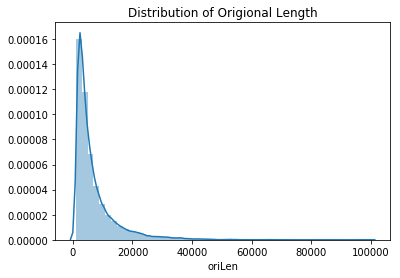

In [29]:
plt.title('Distribution of Origional Length')
sns.distplot(bb['oriLen'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


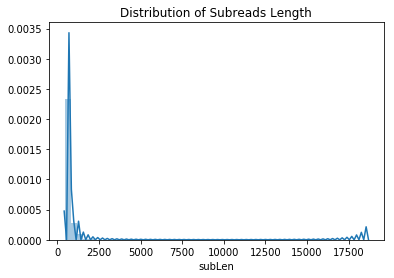

In [30]:
plt.title('Distribution of Subreads Length')
sns.distplot(bb['subLen'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


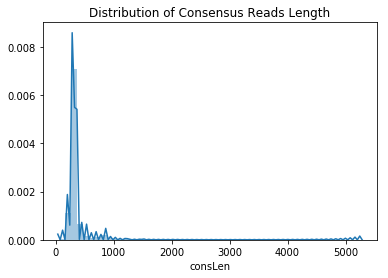

In [31]:
plt.title('Distribution of Consensus Reads Length')
sns.distplot(bb['consLen'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


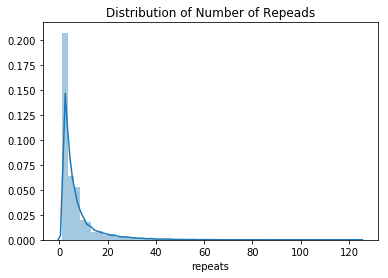

In [32]:
plt.title('Distribution of Number of Repeads')
sns.distplot(bb['repeats']) # mode: repeat = 1

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


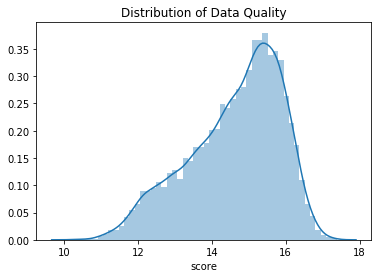

In [40]:
plt.title('Distribution of Data Quality')
sns.distplot(bb['score'])